https://github.com/opencv/opencv/blob/4.x/samples/dnn/face_detect.py

In [1]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Загрузка модели и картинки

In [2]:
!wget https://github.com/opencv/opencv_zoo/raw/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx
!wget https://i.ibb.co/8MTB6wg/Screenshot-101.png

--2022-12-15 14:37:36--  https://github.com/opencv/opencv_zoo/raw/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/opencv/opencv_zoo/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx [following]
--2022-12-15 14:37:37--  https://media.githubusercontent.com/media/opencv/opencv_zoo/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345478 (337K) [application/octet-stream]
Saving to: ‘face_detection_yunet_2022mar.onnx’

face_detect

In [7]:
class YUNET_CROP(object):
    def __init__(self, face_detection_model: str, 
                 score_threshold: float = 0.9, 
                 nms_threshold: float = 0.3,
                 top_k: int = 100,
                 size: tuple[int] = [320, 320], 
                 scale:float = 1, 
                 padding: tuple[int] = (0,0),
                 draw_image: bool = False, 
                 thickness: int=2):
        """
        face_detection_model - path to model
        score_threshold - threshold for detecting images
        top_k - top k images by threshold
        size - resize (for crop model)
        scale - scake for image
        padding - paddind for cropping images, original borders from crop model
        draw_image - draw full image with faces
        thickness - thickness of borders for draw_image
        """
        self.scale = scale
        self.w_padding = padding[0]
        self.h_padding = padding[1]
        self.draw_images = draw_image
        self.thickness = 2
        self.detector = cv.FaceDetectorYN.create(
            face_detection_model,
            "",
            size,
            score_threshold,
            nms_threshold,
            top_k
        )
    def crop(self, img1):
        img1Width = int(img1.shape[1]*args["scale"])
        img1Height = int(img1.shape[0]*args['scale'])
        img1 = cv.resize(img1, (img1Width, img1Height))
        self.detector.setInputSize((img1Width, img1Height))
        faces = self.detector.detect(img1)
        imgs = []
        for i in faces[1]:
            coords = i.astype(np.int32)
            nk = (int(coords[0] - self.h_padding ),int(coords[1] - self.w_padding))
            wh = (int(coords[0]+  self.h_padding + coords[2]), int(coords[1]+self.w_padding + coords[3]))

            imgs.append(img1[nk[1]:wh[1], nk[0]:wh[0]])
            if self.draw_images:
                copy_img = img1.copy()
                cv.rectangle(copy_img, nk, wh, (0, 255, 0), self.thickness)
        if self.draw_images:
            cv2_imshow(img1)
        return faces[1], imgs

In [8]:
args = {}
args["scale"] = 1.0
args["face_detection_model"] = "face_detection_yunet_2022mar.onnx"
args["score_threshold"] = 0.9
args["nms_threshold"] = 0.3
args["top_k"] = 100

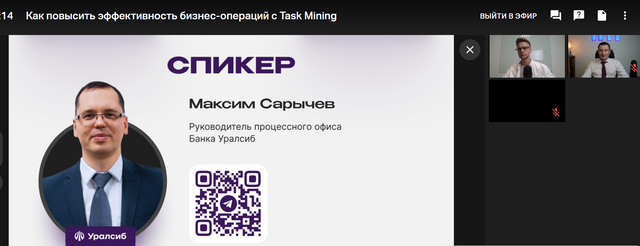

In [9]:
crop_model = YUNET_CROP(draw_images = True,padding= (10,10), **args)
coords, imgs = crop_model.crop(cv.imread("Screenshot-101.png"))

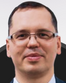

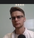

In [10]:
for img in imgs:
    cv2_imshow(img)